1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats
from scipy.integrate import trapezoid

In [54]:
np.random.seed(19680801)
x = np.random.normal(loc= 2, scale= 5, size= 200)

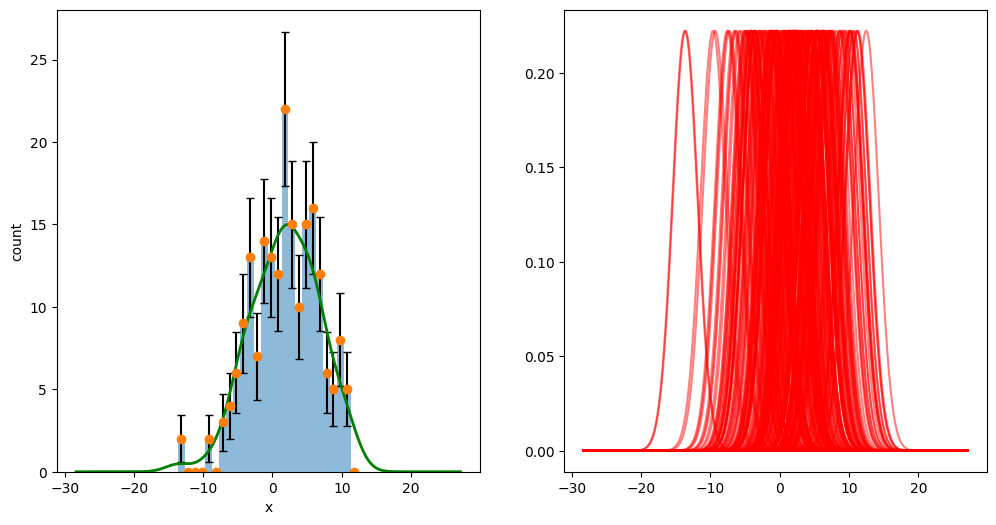

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
counts, edges, patches = ax1.hist(x, bins=np.arange(x.min(), x.max()), label='x', alpha=0.5)

Poisson_uncertainty = np.sqrt(counts)
centers = (edges[:-1]+edges[1:]) / 2

ax1.errorbar(centers, counts, yerr=Poisson_uncertainty, fmt='o', capsize=3, ecolor='black')

ax1.yaxis.set_major_locator(MultipleLocator(5.000))
ax1.set_ylabel('count')
ax1.set_xlabel('x')

def gaussian_kernels(x, bandwidth=None):
    grid = np.linspace(x.min() - 3 * x.std(), x.max() + 3 * x.std(), 500)

    if bandwidth is None:
        bandwidth = 1.06 * x.std() * x.size**(-1./5.)

    # x[:, np.newaxis] turns the array from (200,) into (200, 1)
    # This creates a result of (200, 500) — 200 curves
    return grid, stats.norm.pdf(grid, loc=x[:, np.newaxis], scale=bandwidth)

grid, kernels = gaussian_kernels(x)

ax2.plot(grid, kernels.T, color='red', alpha=0.5)

total_sum = np.sum(kernels, axis=0)
area = trapezoid(total_sum, grid)
hist_area = len(x) * (edges[1] - edges[0])
y_final = (total_sum / area) * hist_area

ax1.plot(grid, y_final, color='green', linewidth=2, label='Total Sum')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png

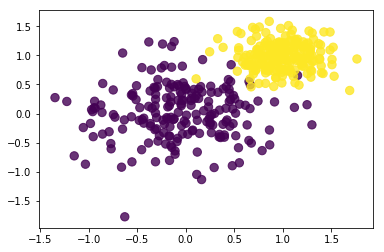

In [94]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [96]:
import seaborn as sns

In [109]:
def dataset(mean1, mean2, std1, std2):
    cov1 = [[std1**2, 0], 
           [0, std1**2]]
    cov2 = [[std2**2, 0], 
           [0, std2**2]]
    dataset1 = np.random.multivariate_normal(mean1, cov1, 200)
    dataset2 = np.random.multivariate_normal(mean2, cov2, 200)
    return dataset1, dataset2

dataset1 , dataset2 = dataset([3, 2], [2, 4], 4, 5)

C:\Users\migue\AppData\Local\Temp\ipykernel_12728\819361142.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


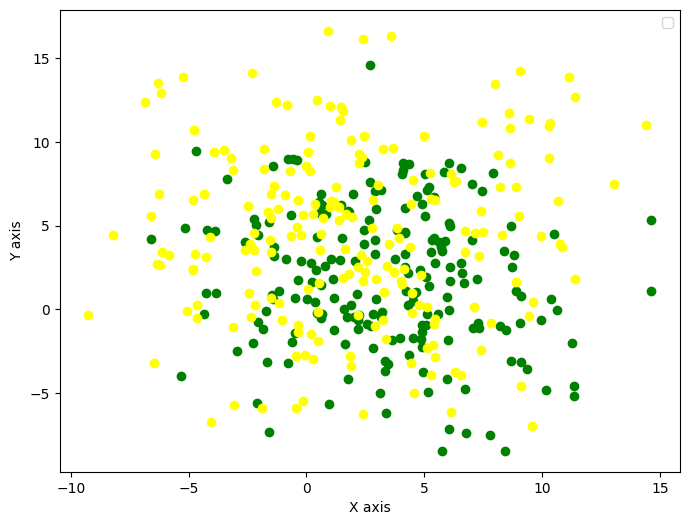

In [110]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(dataset1[:,0], dataset1[:,1], color='green')
ax.scatter(dataset2[:,0], dataset2[:,1], color='yellow')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [111]:
import pandas as pd

In [123]:
data_loader = np.load('residuals_261.npy', allow_pickle=True)
residuals_df = pd.DataFrame(data_loader.item())
residuals_df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [126]:
residuals_df.info()
residuals_df.shape
residuals_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB


,residuals,distances
count,11131.000000,11131.000000
mean,-0.616477,9.771465
std,4.163705,5.877819
min,-160.850000,0.000000
25%,-0.330000,4.400000
50%,-0.110000,9.700000
75%,0.060000,14.900000
max,11.320000,24.900000


In [146]:
residuals_filtered = residuals_df[abs(residuals_df['residuals']) < 2].reset_index()
residuals_filtered.head()

,index,residuals,distances
0,0,1.100000,16.0
1,1,-1.950000,6.3
2,8,-0.042857,3.3
3,9,0.128571,5.3
4,10,0.085714,15.0


In [155]:
slope, intercept, r_value, p_value, std_err = stats.linregress(residuals_filtered['distances'], residuals_filtered['residuals'])

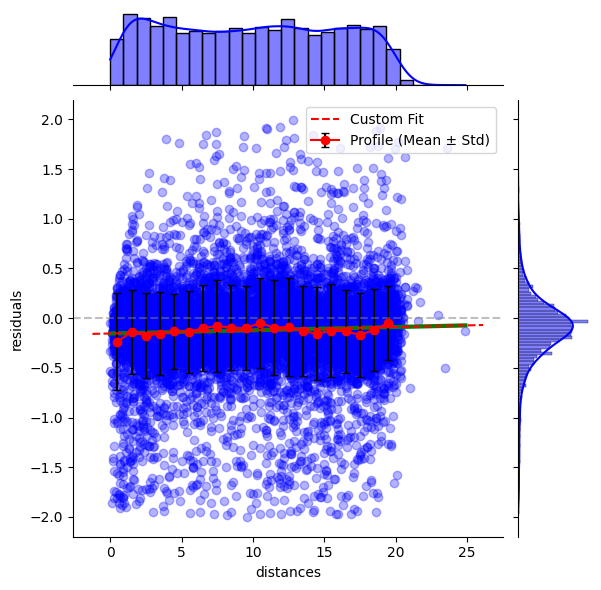

In [156]:
g = sns.jointplot(
    data=residuals_filtered, 
    x='distances', 
    y='residuals', 
    kind='reg',
    color='blue',                        
    joint_kws={
        'line_kws': {'color': 'green', 'lw': 3},  
        'scatter_kws': {'alpha': 0.3}             
    }
)

x_min, x_max = g.ax_joint.get_xlim()
x_values = np.array([x_min, x_max])
y_values = slope * x_values + intercept

x = np.arange(0.5, 20.5, 1)
y_means = []
y_stds = []

for center in x:
    mask = (residuals_filtered['distances'] > center - 0.5) & \
           (residuals_filtered['distances'] <= center + 0.5)
    
    slice_data = residuals_filtered.loc[mask, 'residuals']
    
    if not slice_data.empty:
        y_means.append(slice_data.mean())
        y_stds.append(slice_data.std())
    else:
        y_means.append(0)
        y_stds.append(0)

y = np.array(y_means)
erry = np.array(y_stds)

g.ax_joint.errorbar(x, y, yerr=erry, fmt='o-', color='red', 
                    ecolor='black', capsize=3, label='Profile (Mean ± Std)')
g.ax_joint.axhline(0, color='gray', linestyle='--', alpha=0.5)

g.ax_joint.plot(x_values, y_values, color='red', linestyle='--', label='Custom Fit')
g.ax_joint.plot
g.ax_joint.legend()